<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Assignment 2
<a class="tocSkip">    
</h1>  
   

<h1 style='font-family: Optima;color:red'>
Due Date: 2022-09-21
<a class="tocSkip">    
</h1>  
    
<h2 style='font-family: Optima;color:black'>
Marta Simón Pinacho
<a class="tocSkip">    
</h2>  

    
    

# Preliminaries

+ You are expected to submit your answers using the Jupyter notebook format. You can use this notebook as a template, but make sure to add your personal information (name and email) at the top of the notebook

+ If you want to include additional files (data, scripts, figures, etc.) create a zip file containing all the files and email that file to us. 


## Imports section

In [208]:
import numpy as np
import pandas as pd
import scipy as scp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


# Question 1


+ Solve the second of the Chevalier de Méré problems using Python.  
  *Optional (and mathwise harder):* Can you find a theoretical argument for the answer?

In [210]:
# We are going to generate a dataframe of 24 columns, each one corresponding to a roll. 
# We fill it with random numbers from 1 to 36.(corresponding to our sample space)
# We are going to run the experiment 10000 times, so the df will have 10000 rows.

N = 10000

df = pd.DataFrame(np.random.default_rng(1234).integers(low = 1, high = 37, size = (N,24)))
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,36,36,36,14,7,34,4,10,5,12,...,29,12,29,35,35,10,21,16,10,22
1,33,32,24,32,19,25,35,24,2,27,...,29,32,18,3,6,25,2,25,6,22
2,20,3,7,36,15,16,17,20,7,1,...,16,16,7,27,26,34,28,6,29,36
3,13,7,31,34,36,4,32,17,16,30,...,32,36,12,31,16,17,28,14,28,18
4,1,4,28,9,36,20,7,27,8,17,...,13,28,11,17,4,17,25,27,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12,15,33,2,13,22,34,25,26,19,...,9,8,6,33,9,17,3,5,22,20
9996,32,36,17,20,32,4,28,5,21,21,...,15,26,36,22,5,25,36,17,10,9
9997,4,34,14,12,6,32,28,29,16,12,...,31,5,2,32,3,7,21,25,26,13
9998,35,17,26,4,23,29,18,3,16,4,...,24,14,14,15,8,29,31,28,17,24


In [211]:
# Once the dataframe is generated, we will calculate the absolute frequency of each number in each of the rows.
df_count = df.apply(pd.Series.value_counts, axis=1)
df_count

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
0,NaN,NaN,NaN,1.0,2.0,NaN,1.0,NaN,1.0,3.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,2.0,3.0
1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,1.0,NaN,...,2.0,NaN,1.0,NaN,NaN,4.0,1.0,NaN,1.0,NaN
2,1.0,NaN,1.0,NaN,NaN,1.0,3.0,NaN,NaN,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0
3,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,3.0,NaN,1.0,2.0,3.0,1.0,1.0,NaN,2.0
4,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,NaN,...,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN
9996,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
9997,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,1.0,2.0,NaN,1.0,NaN,NaN
9998,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0


In [221]:
# We look at the absolute frequency of 36, which is the number that indicates that the experiment has been successful 
# (two sixes in 24 runs). 
# We check those that are not NaN, count them, and divide them by the total number of experiments. 
# This corresponds to averaging the non-NaN array, since being Boolean, the average is equal to the probability.
p = (~df_count[36].isna()).mean()
print(f"The probability of rolling a double six in a two dice roll is {p}")

The probability of rolling a double six in a two dice roll is 0.494


# Question 2


+ Using Python illustrate the Birthday Paradox and find the smallest number for which the probability is > 50%.

In [227]:
# Number of rooms (Experiments)
rooms = 100

# 366 is the number we know for sure that there will be some repetition, so we iterate up to that number,
# although it is expected that the probability of matching any birthdays will be earlier.
# As soon as the probability is greater than 50%, the loop stops.
for people in range(1,366):
    df = pd.DataFrame(np.random.default_rng(people).integers(low = 1, high = 367, size=(rooms,people)))

    # We count, for each row, the number of duplicate birthdays.
    df2 = df.apply(pd.Series.duplicated, axis=1).sum(axis=1)

    # If there is any duplicate, we count it as true (Experiment success)
    df2[df2 > 0] = True
    
    # We calculate the probability, dividing by the number of rooms in the experiment.
    p = sum(df2)/rooms
    print(f"For a room size of {people} people, there is a probability of {p}")
    
    if p > 0.5:
        break
        
print(f"The number of people we need to obtain a probability of at least 50% is {people}.")
    

For a room size of 1 people, there is a probability of 0.0
For a room size of 2 people, there is a probability of 0.0
For a room size of 3 people, there is a probability of 0.02
For a room size of 4 people, there is a probability of 0.02
For a room size of 5 people, there is a probability of 0.03
For a room size of 6 people, there is a probability of 0.07
For a room size of 7 people, there is a probability of 0.05
For a room size of 8 people, there is a probability of 0.09
For a room size of 9 people, there is a probability of 0.06
For a room size of 10 people, there is a probability of 0.12
For a room size of 11 people, there is a probability of 0.12
For a room size of 12 people, there is a probability of 0.16
For a room size of 13 people, there is a probability of 0.19
For a room size of 14 people, there is a probability of 0.2
For a room size of 15 people, there is a probability of 0.25
For a room size of 16 people, there is a probability of 0.22
For a room size of 17 people, there 

# Question 3


+ Find the probability that a pin (four digit number) has one or more repeated digits. Check your answer using Python. 

In [228]:
# Number of times the experiment is repeated
M = 100
# We generate a dataframe with 4 columns, corresponding to each pin number, and M rows, corresponding to each experiment.
df = pd.DataFrame(np.random.default_rng(1234).integers(low = 1, high = 9, size = (M,4)))
df

,0,1,2,3
0,8,8,8,4
1,2,8,1,3
2,2,3,5,1
3,7,2,7,3
4,7,8,8,3
...,...,...,...,...
95,7,4,3,6
96,3,6,2,1
97,3,2,7,2
98,5,2,7,6


In [229]:
# We count the number of times a number is repeated in each experiment.
df2 = df.apply(pd.Series.duplicated, axis=1)
df3 = df2.any(axis=1)
df3

0      True
1     False
2     False
3      True
4      True
      ...  
95    False
96    False
97     True
98    False
99     True
Length: 100, dtype: bool

In [234]:
# By calculating the mean of a Boolean array we can get the probability
p = df3.mean()
print(f"The probability that a pin has one or more repeated digits is {p}.")

The probability that a pin has one or more repeated digits is 0.54.


# Question 4


+ Answer the Bayes exercise about the hospital with two ors in Session 04. Get Python to do the math for you. IN doing this, try to write a very generic code so that if you had a hospital with 50 ors your code would need minimal changes. The more generic the code, the more credit you get for this exercise. 

Suppose that a hospital has two operating theaters or rooms. In the first one  $OR_1$  there have been incidents in 20% of the procedures, while in the second one  $OR_2$  the incident rate is just 4%. Assume that the number of operations is the same in both operation rooms. When evaluating the hospital performance we choose at random the report describing one procedure and discover that there was an incident during that procedure. What is the probability that the report corresponds to a procedure conducted in  $OR_1$ ?

In [231]:
# Number of experiments
n = 10000
# Probability of incident in Or1
p_inc_Or1 = 0.2
# Probability of incident in Or2
p_inc_Or2 = 0.04

# We generate random arrays, and put them in a dataframe.
# the or1 will contain the values 0-1 depending on whether there is an incident or not
# the or2 will contain the values 0-2 depending on whether there is an incident or not

Or1 = np.random.choice([0,1],n,p=(1-p_inc_Or1,p_inc_Or1))
Or2 = np.random.choice([0,2],n,p=(1-p_inc_Or2,p_inc_Or2))

df = pd.DataFrame({"Or1":Or1, "Or2":Or2})

df

,Or1,Or2
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
9995,1,0
9996,0,0
9997,0,0
9998,0,0


In [232]:
# We randomly (uniformly) choose an operating room, and store it in the column "Random OR".
indices = np.random.choice(np.arange(len(df.columns) - 1), len(df), replace=True)

df['RandomOR'] = df.to_numpy()[np.arange(len(df)), indices]
df

,Or1,Or2,RandomOR
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
9995,1,0,1
9996,0,0,0
9997,0,0,0
9998,0,0,0


In [247]:
# We count how many of the randomly selected operating rooms have been Or1 incidents and divide by the number of incidents.
num_inc = (df["RandomOR"] != 0).sum()
print(f"Total number of incidents: {num_inc}")

# We count the number of incidents in OR1
num_inc_or1 = (df["RandomOR"] == 1).sum()
print(f"Number of incidents in Or1: {num_inc_or1}")

p = num_inc_or1/num_inc
print(f"The probability that the report corresponds to a procedure conducted in  OR1 is {p}.")

Total number of incidents: 2076
Number of incidents in Or1: 2076
The probability that the report corresponds to a procedure conducted in  OR1 is 1.0.


# Question 5


+ Do exercises S04-003 and S04-004 from Session 04 on Random Variables.

    + **Exercise: S04-003**:        
          
        (a) Load the data table into the `framingham` pandas DataFrame. You have done this before.  
        (b) Find the probability that a randomly chosen patient is hypertensive, and call it $p$.  
        (c) Instead of choosing a single patient, suppose that we choose seven patients at random and with replacement. Let $X$ denote the number of hypertensive patients among those seven. What values can this variable $X$ actually take?  
        (d) Use Python to choose a sample of seven patients (with replacement) and count the number of hypertensive patients in that sample.  
        (e) Iterate the previous step $N = 50000$ times and store the 50000 results in a NumPy array called `X_samples`. Get a relative frequency table of the different values in `X_samples.`  
        (f) Choose the right plot to illustrate the contents of `X_samples`.

In [242]:
# (a) Load the data table into the framingham pandas DataFrame.
framingham_link = 'https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv'
framingham = pd.read_csv(framingham_link)

# b)
# Find out what is the probability that if I choose a patient at random, he/she will be hypertensive.
# We obtain the relative frequency, which in this case will be the same as the probability.
p = framingham["prevalentHyp"].value_counts(normalize = True)[1]
print(f"Probability that a random patient is hypertensive: {p}")

# c) and d)
# Take 7 hypertensive patients with replacement (sum to see how many ones there are). In the binomial, 1 = success, 0 = failure. 
n=7
prevalentHip_sample = framingham["prevalentHyp"].sample(n, replace=True, random_state=2022)
# Sum because the binomial variable is the number of hypertensive patients. Add them all up to see which ones have been successful.
print(f"Sum of 7 random persons are hypertensive (binomial variable): {prevalentHip_sample.sum()}")

# e)
# Iterate the previous step 50000 times.
# With the 50000 repetitions we can calculate relative frequencies, and calculate probabilities.
N = 50000
np_prevHyp = np.array(framingham["prevalentHyp"])
rng = np.random.default_rng(seed= 2022)
# The size parameter is to make a matrix (50000*7), it takes 500000 samples of 7
X_samples = rng.choice(np_prevHyp, size = (N,7), replace = True)

print("The first elements of the table we have created are: ")
print(X_samples[:10])

print ("Number of hypertensive patients in each sample")
# Sum by rows (axis = 1)
num_hyp_sample_X = X_samples.sum(axis=1)
print(num_hyp_sample_X)

# Empirical version of the binomial
print("The relative frequency of each possible number of hipertensive patients is:")
num_hyp_sample_X_pd = pd.DataFrame(num_hyp_sample_X, columns=["num_hyp"])
rel_freqs = num_hyp_sample_X_pd.value_counts(normalize=True).sort_index()
# This table shows the probability that, when taking 7 people, none of them are hypertensive, one is hypertensive,
# two are hypertensive, etc. So for each row.
print(rel_freqs)

Probability that a random patient is hypertensive: 0.3106132075471698
Sum of 7 random persons are hypertensive (binomial variable): 1
Los primeros elementos de la tabla que hemos creado son: 
[[0 0 0 1 0 0 0]
 [0 1 1 0 0 1 0]
 [0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 1 1 1]
 [1 1 1 0 0 0 1]
 [0 1 0 0 0 0 1]
 [1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0]]
Numero de hipertensos en cada muestra
[1 3 0 ... 2 3 2]
The relative frequency of each possible number of hipertensive patients is:
num_hyp
0          0.07408
1          0.23284
2          0.31478
3          0.23676
4          0.10814
5          0.02884
6          0.00438
7          0.00018
dtype: float64


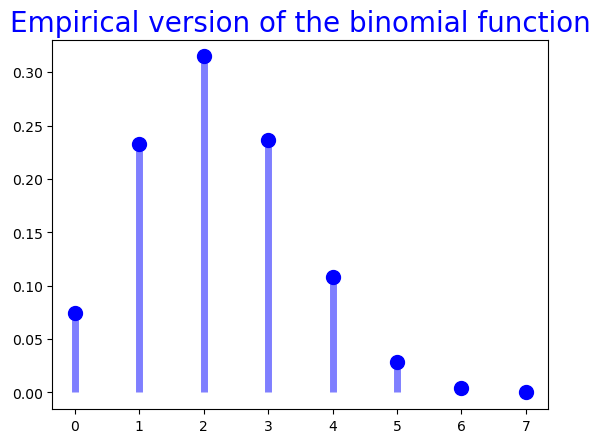

In [14]:
#plot = rel_freqs.plot.bar(rot=0, xlabel='Relative frequency of hypertenses', ylabel ='Counts')
fig, ax = plt.subplots(1, 1)
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n +1, step = 1)

# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = rel_freqs, colors='b', lw=5, alpha=0.5)
# And this one plots the "stem"
ax.plot(x, rel_freqs, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Empirical version of the binomial function", fontsize=20, color="blue")

   + **Exercise: S04-003**  
        (a) use Python to get the theoretical probabilities for the binomial variable of the preceding exercise. Recall that $X$ = number of hypertensive patients in a sample (with replacement) of seven patients from the framingham data set.  
        (b) Compare the theoretical values with the relative frequencies that you obtained in that exercise for $N = 50000$ samples of size 7.

In [243]:
n = 7 # tamaño de la muestra
p = framingham["prevalentHyp"].value_counts(normalize = True)[1] # Probabilidad de hipertenso
k = 3 # Numero del 0 al 7. Cuantos pacientes hipertensos dentro de esos siete. Tiene que estar dentro del tamaño de la muestra. 
X_binom = stats.binom(n,p) # Cobngelamos la binomial para iterar con todas las ks del 1 al 7
binoms = ([X_binom.pmf(k) for k in range(0,n+1)])
print(binoms)

[0.07400153210998552, 0.23339723726375544, 0.3154815205025993, 0.23690794988135636, 0.1067423092691572, 0.028856576388808765, 0.004333916193871722, 0.00027895839046620683]


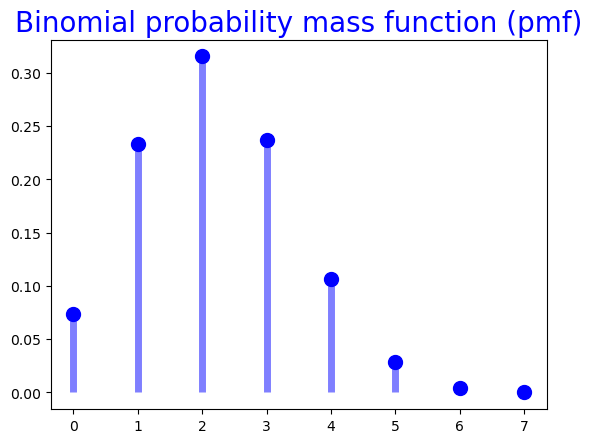

In [244]:
# Now, we can plot the binomial function 
fig, ax = plt.subplots(1, 1)

# First we create arrays with all posible values for this variable
x = np.arange(start = 0, stop = n+1 , step = 1)

# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = binoms, colors='b', lw=5, alpha=0.5)

# And this one plots the "stem"
ax.plot(x, binoms, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Binomial probability mass function (pmf)", fontsize=20, color="blue")

In [245]:
# Comparing both results, we can see that they are almost the same.
df_compare = pd.DataFrame(rel_freqs, columns=["Empirical Version"])
df_compare["Python Version"] = binoms
df_compare


,Empirical Version,Python Version
num_hyp,,
0,0.07408,0.074002
1,0.23284,0.233397
2,0.31478,0.315482
3,0.23676,0.236908
4,0.10814,0.106742
5,0.02884,0.028857
6,0.00438,0.004334
7,0.00018,0.000279
